In [8]:
import tensorflow as tf
from keras.utils import to_categorical

In [12]:
%%capture
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from time import time
import numpy as np

In [13]:
# implement mobile net from scratch
def mobilenet(input_shape, n_classes):
  
  def mobilenet_block(x, f, s=1):
    x = DepthwiseConv2D(3, strides=s, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(f, 1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
    
    
  input = Input(input_shape)

  x = Conv2D(32, 3, strides=2, padding='same')(input)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  x = mobilenet_block(x, 64)
  x = mobilenet_block(x, 128, 2)
  x = mobilenet_block(x, 128)

  x = mobilenet_block(x, 256, 2)
  x = mobilenet_block(x, 256)

  x = mobilenet_block(x, 512, 2)
  for _ in range(5):
    x = mobilenet_block(x, 512)

  x = mobilenet_block(x, 1024, 2)
  x = mobilenet_block(x, 1024)
  
  x = GlobalAvgPool2D()(x)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

In [4]:
input_shape = 224, 224, 3
n_classes = 1000

K.clear_session()
model = mobilenet(input_shape, n_classes)
model.summary()
     

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 112, 112, 32)      0         
                                                                 
 depthwise_conv2d (Depthwise  (None, 112, 112, 32)     320       
 Conv2D)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 32)     128   

                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 512)       262656    
                                                                 
 batch_normalization_16 (Bat  (None, 14, 14, 512)      2048      
 chNormalization)                                                
                                                                 
 re_lu_16 (ReLU)             (None, 14, 14, 512)       0         
                                                                 
 depthwise_conv2d_8 (Depthwi  (None, 14, 14, 512)      5120      
 seConv2D)                                                       
                                                                 
 batch_normalization_17 (Bat  (None, 14, 14, 512)      2048      
 chNormalization)                                                
                                                                 
 re_lu_17 (ReLU)             (None, 14, 14, 512)       0         
          

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train/255
x_test = x_test/255
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 10))

In [14]:
model = mobilenet(x_train.shape[1:],10)

In [20]:
from keras.optimizers import Adam, SGD
from keras.optimizers import SGD, RMSprop, Adam, Nadam
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, DepthwiseConv2D, AveragePooling2D, Activation,InputLayer
from keras.layers import BatchNormalization, Dropout
from keras import backend
from keras.preprocessing.image import ImageDataGenerator

In [29]:
model.compile(optimizer = RMSprop(learning_rate = 0.001, rho = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [30]:
datagen = ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    validation_split=0.1)

In [31]:
train_generator = datagen.flow(x_train,y_train,batch_size=128, subset='training')
validation_generator = datagen.flow(x_train,y_train, subset='validation')

In [33]:
history = model.fit(train_generator, 
                              validation_data = validation_generator, 
                              epochs=10, 
                              verbose = 1)

Epoch 1/10
352/352 [==============================] - 146s 414ms/step - loss: 0.9763 - accuracy: 0.6592 - val_loss: 1.2940 - val_accuracy: 0.5942
Epoch 2/10
352/352 [==============================] - 143s 405ms/step - loss: 0.9256 - accuracy: 0.6796 - val_loss: 1.0264 - val_accuracy: 0.6576
Epoch 3/10
352/352 [==============================] - 145s 412ms/step - loss: 0.8895 - accuracy: 0.6949 - val_loss: 1.0288 - val_accuracy: 0.6592
Epoch 4/10
352/352 [==============================] - 143s 406ms/step - loss: 0.8255 - accuracy: 0.7148 - val_loss: 1.0907 - val_accuracy: 0.6482
Epoch 5/10
352/352 [==============================] - 146s 414ms/step - loss: 0.7976 - accuracy: 0.7266 - val_loss: 1.0312 - val_accuracy: 0.6768
Epoch 6/10
352/352 [==============================] - 159s 451ms/step - loss: 0.7602 - accuracy: 0.7366 - val_loss: 0.9411 - val_accuracy: 0.6956
Epoch 7/10
352/352 [==============================] - 157s 446ms/step - loss: 0.7340 - accuracy: 0.7479 - val_loss: 0.9413 -

In [35]:
import matplotlib.pyplot as plt

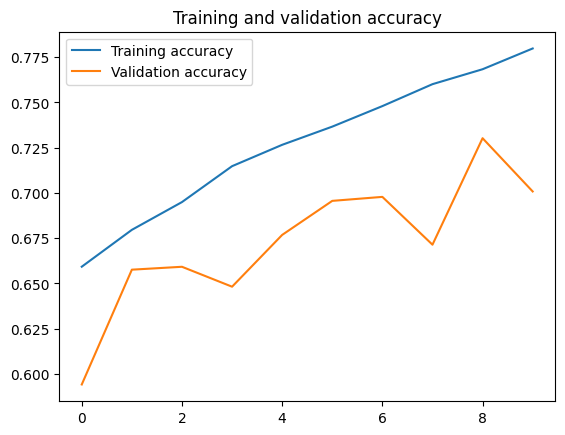

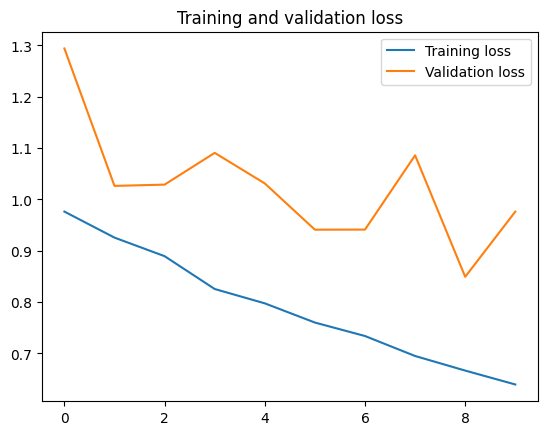

In [36]:
# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(len(acc))

plt.plot(epoch_range, acc, label='Training accuracy')
plt.plot(epoch_range, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epoch_range, loss, label='Training loss')
plt.plot(epoch_range, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [5]:
input_shape = 224, 224, 3
n_classes = 1000

K.clear_session()
model = mobilenet(input_shape, n_classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 112, 112, 32)      0         
                                                                 
 depthwise_conv2d (Depthwise  (None, 112, 112, 32)     320       
 Conv2D)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 32)     128   

                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 512)       262656    
                                                                 
 batch_normalization_16 (Bat  (None, 14, 14, 512)      2048      
 chNormalization)                                                
                                                                 
 re_lu_16 (ReLU)             (None, 14, 14, 512)       0         
                                                                 
 depthwise_conv2d_8 (Depthwi  (None, 14, 14, 512)      5120      
 seConv2D)                                                       
                                                                 
 batch_normalization_17 (Bat  (None, 14, 14, 512)      2048      
 chNormalization)                                                
                                                                 
 re_lu_17 (ReLU)             (None, 14, 14, 512)       0         
          

In [10]:
pip install netron

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\dell\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [12]:
model.save('test.h5')
!pip install netron
import netron
netron.start('test.h5', 8081)

Serving 'test.h5' at http://localhost:8081


You should consider upgrading via the 'c:\users\dell\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


('localhost', 8081)

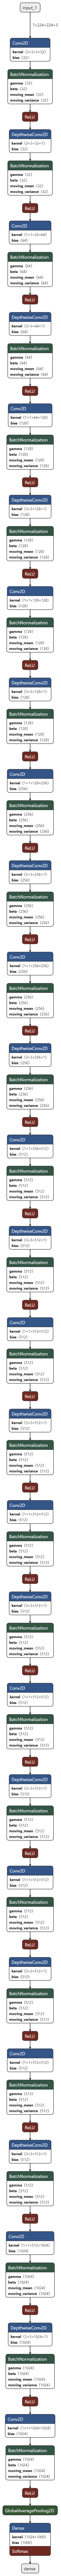

In [13]:
repetitions = 10
input = np.random.randn(1, *input_shape)

output = model.predict(input)
start = time()
for _ in range(repetitions):
  output = model.predict(input)
  
print((time() - start) / repetitions)

1/1 [==============================] - 0s 31ms/step
0.05149998664855957
